**Import The TensorFlow Library**

In [0]:
from __future__ import print_function

import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

**Load Data**

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot=True)


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


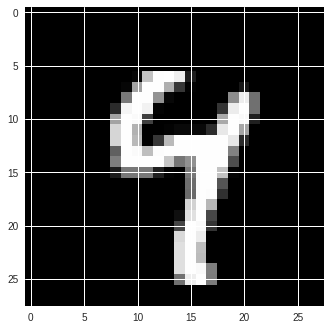

In [3]:
first_image = mnist.train.images[2]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()


**Hyperparameters**

In [0]:
learning_rate = 0.01
training_epochs = 20
batch_size = 100

**Placeholders**

In [0]:
x = tf.placeholder(tf.float32, [None, 784]) 
y = tf.placeholder(tf.float32, [None, 10]) 

**Variables**

In [0]:
W = tf.Variable(tf.zeros([784, 10]))
b = tf.Variable(tf.zeros([10]))

**Prediction**

In [0]:
y_hat = tf.nn.softmax(tf.matmul(x, W) + b) 

**Loss Function**

In [0]:
loss = tf.nn.softmax_cross_entropy_with_logits_v2(logits=y_hat, labels=y)
loss = tf.reduce_mean(loss)*100

**Training Procedure**


In [0]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate)

train_step = optimizer.minimize(loss)

In [0]:
init = tf.global_variables_initializer()

In [0]:
correct_prediction = tf.equal(tf.argmax(y_hat,1), tf.argmax(y,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))


**Train The Model**

In [12]:
print("\n")

display_step = 10

n_iterations = []  
n_loss = []
n_loss_test = []
n_train_accuracy = []
n_test_accuracy = []
with tf.Session() as sess:

    
    sess.run(init)

    
    total_steps = 0;
    for epoch in range(training_epochs):
        avg_cost = 0.
        avg_accuracy = 0.
        avg_accuracy_test = 0.0
        
        total_batch = int(mnist.train.num_examples/batch_size)
        
        for i in range(total_batch):
            total_steps = total_steps +1
            batch_xs, batch_ys = mnist.train.next_batch(batch_size)
            
            #Train
            sess.run(train_step, feed_dict={x: batch_xs, y: batch_ys})
           
            #Evaluate
            train_accuracy, c = sess.run([accuracy,loss],feed_dict={x: batch_xs, y: batch_ys})
            test_accuracy, c_test = sess.run([accuracy,loss],feed_dict={x: mnist.test.images, y: mnist.test.labels})
            
            
           
            avg_cost += c / total_batch
            avg_accuracy += train_accuracy /total_batch
            avg_accuracy_test += test_accuracy /total_batch
            
            n_iterations.append(total_steps)
            n_loss.append(c)
            n_loss_test.append(c_test)
            n_train_accuracy.append(train_accuracy)
            n_test_accuracy.append(test_accuracy)
           
        
        if (epoch+1) % display_step == 0 or epoch == 0:
            print("Epoch:", '%04d' % (epoch+1), " Cost=", "{:.9f}".format(avg_cost), " Train_Accuracy=", "{:.9f}".format(avg_accuracy)," Test_Accuracy=", "{:.9f}".format(avg_accuracy_test))

    print("Training Finished!")

    
    final_test_accuracy = sess.run(accuracy,feed_dict={x: mnist.test.images, y: mnist.test.labels})
    print("\nTest_Accuracy:", final_test_accuracy)



Epoch: 0001  Cost= 163.896602728  Train_Accuracy= 0.872072727  Test_Accuracy= 0.865299818
Epoch: 0010  Cost= 154.204828325  Train_Accuracy= 0.930963638  Test_Accuracy= 0.925086546
Epoch: 0020  Cost= 153.465030712  Train_Accuracy= 0.936236363  Test_Accuracy= 0.928024726
Training Finished!

Test_Accuracy: 0.9295


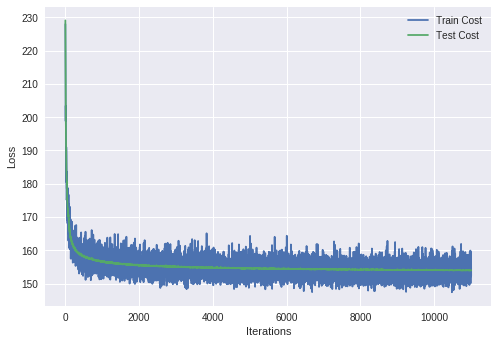

In [13]:
plt.plot(n_iterations,n_loss, label='Train Cost')
plt.plot(n_iterations,n_loss_test, label='Test Cost')
plt.ylabel('Loss')
plt.xlabel('Iterations')
plt.legend()
plt.show()

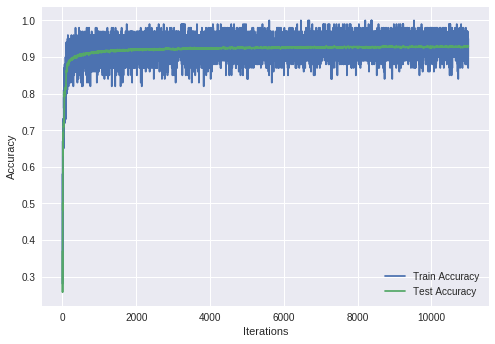

In [14]:
plt.plot(n_iterations,n_train_accuracy, label='Train Accuracy')
plt.plot(n_iterations,n_test_accuracy, label='Test Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Iterations')
plt.legend()
plt.show()